<a href="https://colab.research.google.com/github/rexwotan-A01840088/Ciencia-y-Analitica-de-datos/blob/main/Actividad7PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: Rex Wotan Dominguez Chang
*   MATRÍCULA: A01840088
*   NOMBRE: Sofía Donlucas Bañuelos
*   MATRÍCULA: A01655565
*   NOMBRE: Gerardo Duarte Ceballos
*   MATRÍCULA: A01273069
*   NOMBRE: Miguel
*   MATRÍCULA: A0


En esta actividad trabajarás con el archivo `automobile_dataset.csv`, basado en un conjunto de datos sobre características técnicas y especificaciones de automóviles, disponible en el repositorio UCI Machine Learning.

Los datos fueron recopilados para analizar diferentes aspectos de los vehículos y sus precios, e incluyen información sobre el fabricante, tipo de motor, dimensiones, peso, rendimiento de combustible y otras especificaciones técnicas. Los indicadores incluidos son:

* `symboling`: Nivel de riesgo del seguro del automóvil, de -3 (bajo riesgo) a +3 (alto riesgo)
* `normalized_losses`: Pérdidas normalizadas del seguro (valor numérico de la aseguradora, algunas veces faltante)
* `make`: Marca del automóvil (por ejemplo, Audi, BMW, Honda)
* `fuel_type`: Tipo de combustible (gasolina o diésel)
* `aspiration`: Tipo de aspiración del motor (normal o turbo)
* `num_doors`: Número de puertas del automóvil (dos o cuatro)
* `body_style`: Estilo de carrocería (sedán, hatchback, wagon, hardtop, convertible)
* `drive_wheels`: Tipo de tracción (fwd: delantera, rwd: trasera, 4wd: en las cuatro ruedas)
* `engine_location`: Ubicación del motor (delantero o trasero)
* `wheel_base`: Distancia entre ejes (en pulgadas)
* `length`: Largo total del automóvil (en pulgadas)
* `width`: Ancho total del automóvil (en pulgadas)
* `height`: Altura total del automóvil (en pulgadas)
* `curb_weight`: Peso del automóvil sin carga (en libras)
* `engine_type`: Tipo de motor (OHV, OHC, DOHC, etc.)
* `num_cylinders`: Número de cilindros del motor
* `engine_size`: Tamaño del motor (en cc)
* `fuel_system`: Sistema de combustible (por ejemplo, mpfi, 2bbl, 4bbl)
* `bore`: Diámetro del cilindro (en pulgadas)
* `stroke`: Carrera del pistón (en pulgadas)
* `compression_ratio`: Relación de compresión del motor
* `horsepower`: Potencia del motor (en caballos de fuerza)
* `peak_rpm`: Revoluciones máximas por minuto
* `city_mpg`: Rendimiento de combustible en ciudad (millas por galón)
* `highway_mpg`: Rendimiento de combustible en carretera (millas por galón)
* `price`: Precio del automóvil (en dólares estadounidenses) Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

1. Descarga el archivo: `automobile_dataset.csv` y guarda, en un dataframe (`cars_df`), todos sus registros.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?
* Al revisar los primeros registros, notarás que la columna `normalized_losses` contiene el símbolo `?`. Esto sugiere que se utilizó para indicar valores faltantes. Identifica todas las columnas que presentan este símbolo.
* Sustituye el símbolo `?` por valores faltantes (`NaN`) y convierte las columnas al tipo de dato adecuado. Esto es necesario porque la presencia del símbolo pudo haber hecho que pandas las interpretara como object, aunque en realidad no lo fueran.

In [9]:
import pandas as pd
import numpy as np
from io import StringIO

path = '/content/automobile_dataset.csv'
cars_df = pd.read_csv(path)

buf = StringIO()
cars_df.info(buf=buf)
print(">>> info() ANTES de limpiar")
print(buf.getvalue())

dtypes_before = cars_df.dtypes
num_numeric_before = dtypes_before.apply(lambda dt: pd.api.types.is_numeric_dtype(dt)).sum()
num_text_before = (dtypes_before == 'object').sum()
print(f"\nNuméricas (antes): {num_numeric_before}")
print(f"Texto/objeto (antes): {num_text_before}")

cols_with_qmark = [col for col in cars_df.columns if (cars_df[col] == '?').any()]
print("\nColumnas con símbolo '?':", cols_with_qmark)

cars_df = cars_df.replace('?', np.nan)

numeric_cols = [
    'symboling','normalized_losses','wheel_base','length','width','height','curb_weight',
    'engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg',
    'highway_mpg','price'
]
for col in numeric_cols:
    if col in cars_df.columns:
        cars_df[col] = pd.to_numeric(cars_df[col], errors='coerce')

buf2 = StringIO()
cars_df.info(buf=buf2)
print("\n>>> info() DESPUÉS de limpiar")
print(buf2.getvalue())

dtypes_after = cars_df.dtypes
num_numeric_after = dtypes_after.apply(lambda dt: pd.api.types.is_numeric_dtype(dt)).sum()
num_text_after = (dtypes_after == 'object').sum()
print(f"Numéricas (después): {num_numeric_after}")
print(f"Texto/objeto (después): {num_text_after}")

>>> info() ANTES de limpiar
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    int64  
 16

# Análisis exploratorio de datos (univariado)

2. Antes de iniciar con el análisis univariado, verifica si hay valores duplicados e imprime el porcentaje de faltantes por columna.
* Obtén las estadísticas descriptivas, separado las numéricas (incluye asimetría y curtosis) y las categóricas (incluye tablas de frecuencias).
* Genera histogramas para las numéricas y diagramas de barras para las categóricas.

=== Duplicados ===
Registros duplicados: 0 (0.00%)

=== Porcentaje de faltantes por columna ===
normalized_losses   20.0000
stroke               1.9512
price                1.9512
bore                 1.9512
horsepower           0.9756
peak_rpm             0.9756
make                 0.0000
fuel_type            0.0000
aspiration           0.0000
symboling            0.0000
wheel_base           0.0000
engine_location      0.0000
drive_wheels         0.0000
body_style           0.0000
num_doors            0.0000
length               0.0000
height               0.0000
width                0.0000
fuel_system          0.0000
engine_size          0.0000
num_cylinders        0.0000
engine_type          0.0000
curb_weight          0.0000
compression_ratio    0.0000
city_mpg             0.0000
highway_mpg          0.0000

=== Descriptivos numéricos (incluye asimetría y curtosis) ===
                     count        mean        std        min        25%         50%         75%         max  skew

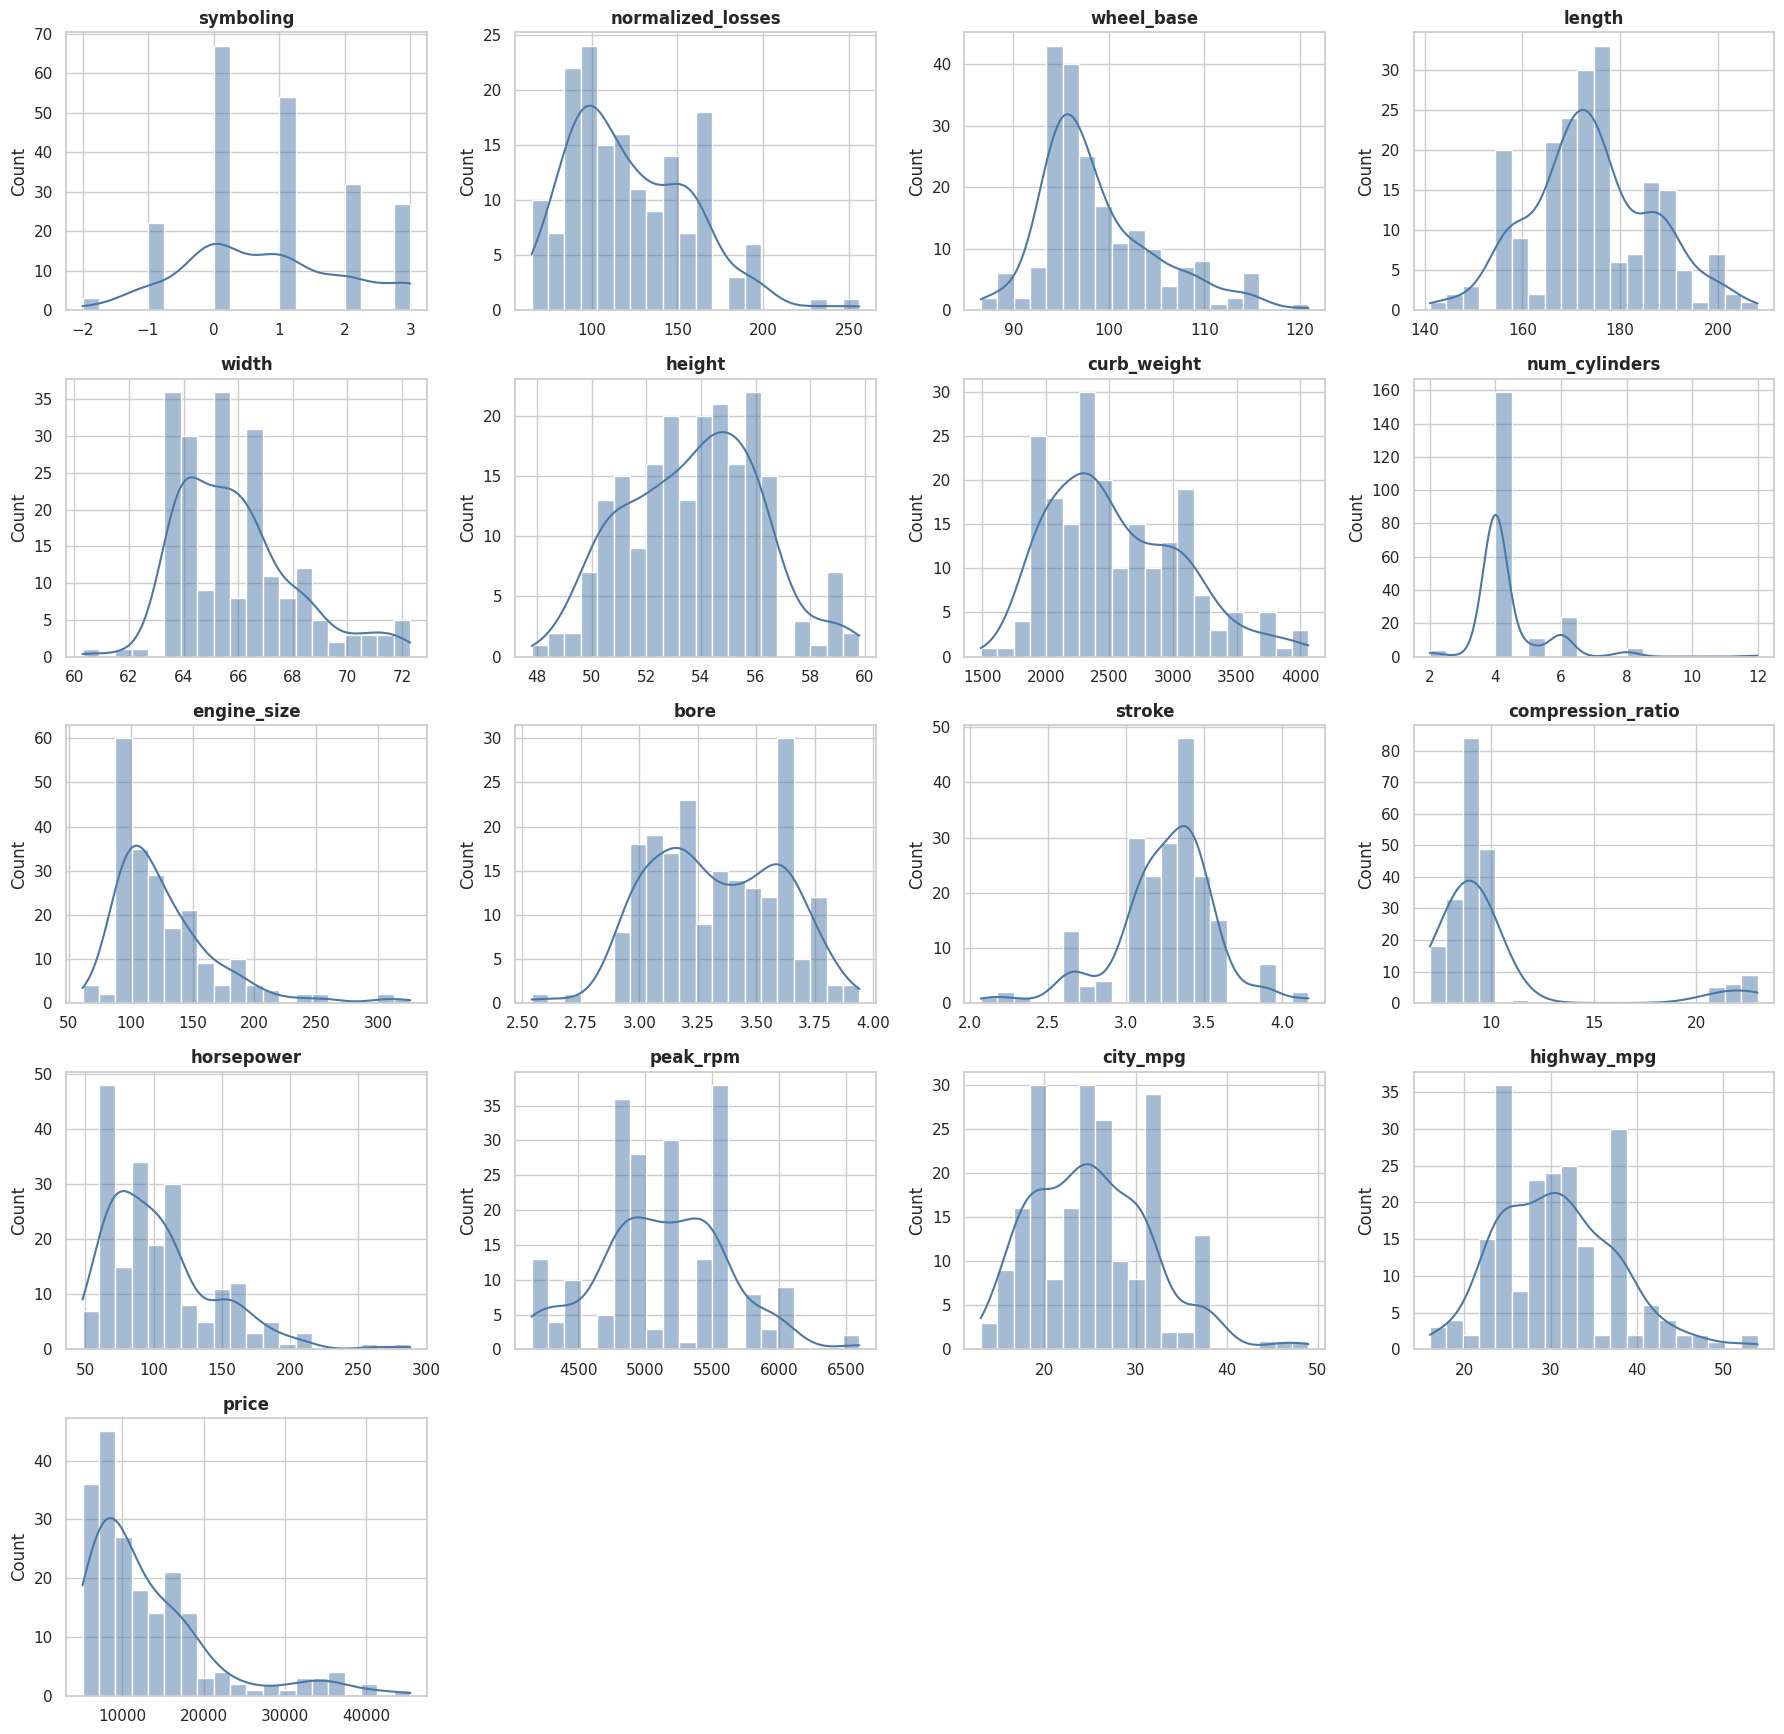

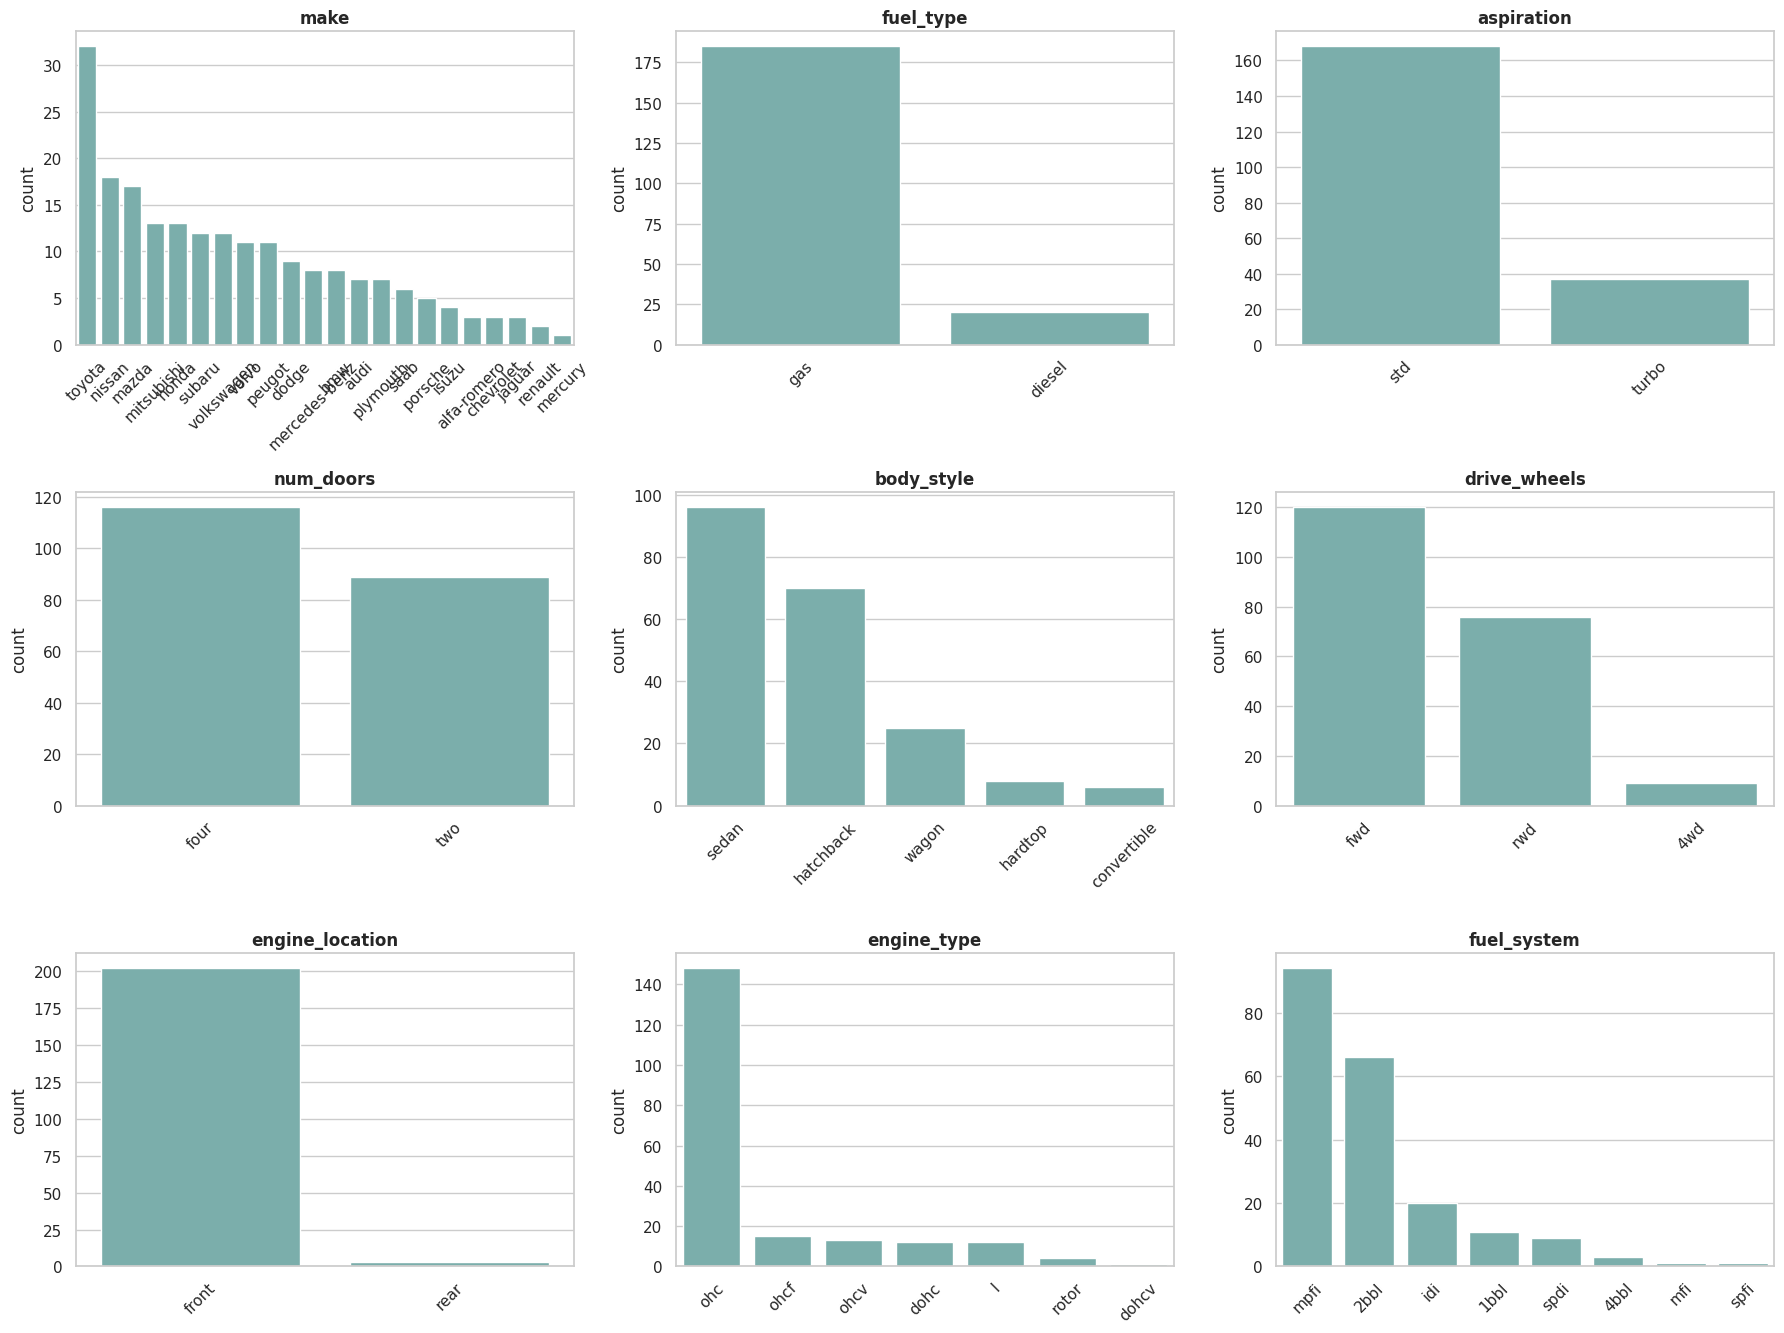


✅ Listo. Archivos generados en: /content/outputs_univariado


In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: f'{x:,.4f}')
sns.set(style='whitegrid', context='notebook', palette='deep')

CSV_PATH = '/content/automobile_dataset.csv'
OUTPUT_DIR = 'outputs_univariado'
os.makedirs(OUTPUT_DIR, exist_ok=True)

df = pd.read_csv(CSV_PATH)

df = df.replace('?', np.nan)

numeric_cols = [
    'symboling','normalized_losses','wheel_base','length','width','height','curb_weight',
    'engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm',
    'city_mpg','highway_mpg','price'
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

num_dups = df.duplicated().sum()
perc_dups = 100 * num_dups / len(df)
print("=== Duplicados ===")
print(f"Registros duplicados: {num_dups} ({perc_dups:.2f}%)\n")

print("=== Porcentaje de faltantes por columna ===")
missing_pct = df.isna().mean().mul(100).sort_values(ascending=False)
print(missing_pct.to_string())

missing_pct.to_frame('missing_pct').to_csv(os.path.join(OUTPUT_DIR, 'missing_percentages.csv'))

num_df = df.select_dtypes(include=[np.number])
cat_df = df.select_dtypes(include=['object'])

num_desc = num_df.describe().T
num_skew = num_df.skew(numeric_only=True)
num_kurt = num_df.kurtosis(numeric_only=True)

num_full = (
    num_desc
    .join(num_skew.rename('skewness'))
    .join(num_kurt.rename('kurtosis'))
    .sort_index()
)

print("\n=== Descriptivos numéricos (incluye asimetría y curtosis) ===")
print(num_full.to_string())

num_full.to_csv(os.path.join(OUTPUT_DIR, 'numeric_descriptives_with_skew_kurt.csv'))

print("\n=== Frecuencias categóricas (conteo y %) ===")
for col in cat_df.columns:
    vc = df[col].value_counts(dropna=False)
    vp = df[col].value_counts(dropna=False, normalize=True).mul(100)
    freqs = pd.DataFrame({'count': vc, 'percent': vp}).sort_values('count', ascending=False)
    print(f"\n-- {col} --")
    print(freqs.to_string())

    freqs.to_csv(os.path.join(OUTPUT_DIR, f'freq_{col}.csv'))

if len(num_df.columns) > 0:
    n_num = len(num_df.columns)
    cols = 4
    rows = int(np.ceil(n_num / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4.5, rows*3.5))
    axes = np.array(axes).reshape(rows, cols)

    for i, col in enumerate(num_df.columns):
        r, c = divmod(i, cols)
        ax = axes[r, c]

        sns.histplot(num_df[col].dropna(), bins=20, kde=True, ax=ax, color='#4C78A8')
        ax.set_title(col)
        ax.set_xlabel('')

    for j in range(i+1, rows*cols):
        r, c = divmod(j, cols)
        axes[r, c].axis('off')

    plt.tight_layout()
    hist_path = os.path.join(OUTPUT_DIR, 'hist_numeric_features.png')
    plt.savefig(hist_path, dpi=150, bbox_inches='tight')
    plt.show()


if len(cat_df.columns) > 0:
    n_cat = len(cat_df.columns)
    cols2 = 3
    rows2 = int(np.ceil(n_cat / cols2))
    fig2, axes2 = plt.subplots(rows2, cols2, figsize=(cols2*6, rows2*4.5))
    axes2 = np.array(axes2).reshape(rows2, cols2)

    for i, col in enumerate(cat_df.columns):
        r, c = divmod(i, cols2)
        ax = axes2[r, c]
        order = df[col].value_counts(dropna=False).index
        sns.countplot(data=df, x=col, order=order, ax=ax, color='#72B7B2')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('count')
        ax.tick_params(axis='x', rotation=45)

    for j in range(i+1, rows2*cols2):
        r, c = divmod(j, cols2)
        axes2[r, c].axis('off')

    plt.tight_layout()
    bar_path = os.path.join(OUTPUT_DIR, 'bar_categorical_features.png')
    plt.savefig(bar_path, dpi=150, bbox_inches='tight')
    plt.show()

print("\n✅ Listo. Archivos generados en:", os.path.abspath(OUTPUT_DIR))

# Análisis exploratorio de datos (bivariado)

3. Genera algunos gráficos bivariados para familiarizarte con el conjunto de datos:
* Gráfico de barras apiladas normalizadas que muestra la distribución de los tipos de tracción para cada fabricante.
* Diagrama de cajas para visualizar cómo se distribuye el precio de los automóviles según el estilo de carrocería. Esto permitirá comparar la mediana, los cuartiles y la presencia de valores atípicos entre los diferentes tipos de carrocería.
* Gráfico de barras que muestre los 10 automóviles más caros, ordenados de mayor a menor precio, con cada barra diferenciada por fabricante.
* Diagrama de dispersión para explorar la relación entre el tamaño del motor y el precio de los automóviles. Diferencia con colores los puntos según el tipo de aspiración y con el tamaño de los puntos el número de puertas.

**Nota.** Debes incluir en cada gráfico una conclusión de lo observado.

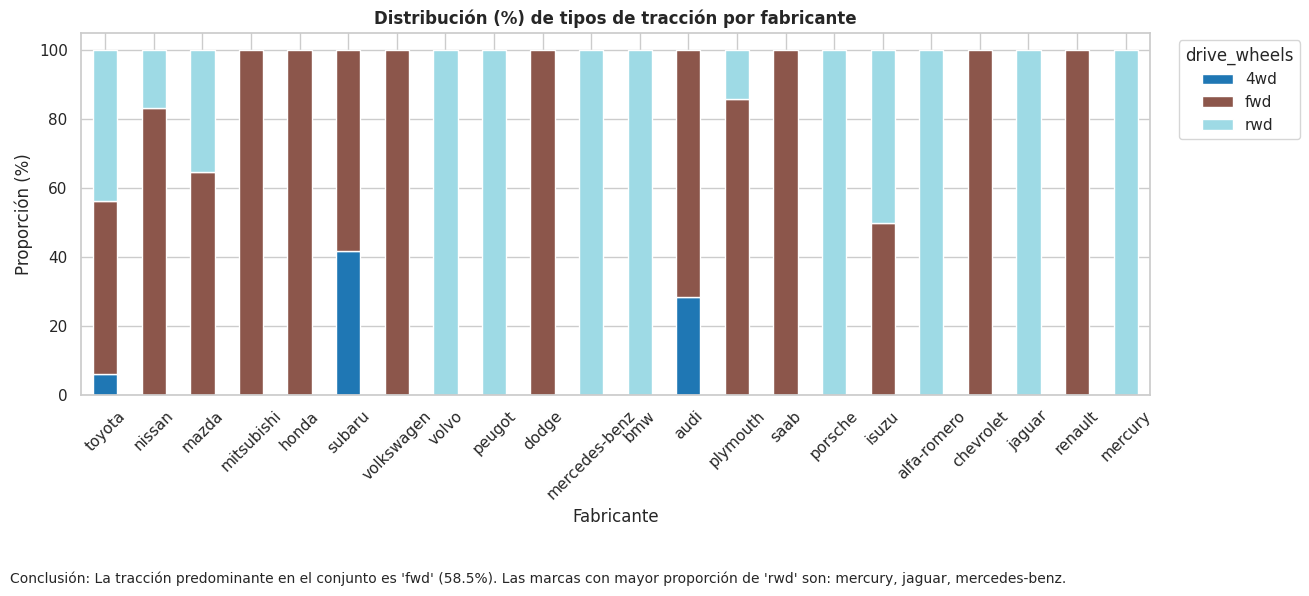

/tmp/ipython-input-1121507107.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_bs = df_box.groupby(bs)[price].median().sort_values(ascending=False).index
/tmp/ipython-input-1121507107.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medianas = df_box.groupby(bs)[price].median().sort_values(ascending=False)
/tmp/ipython-input-1121507107.py:77: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iqr = df_box.groupb

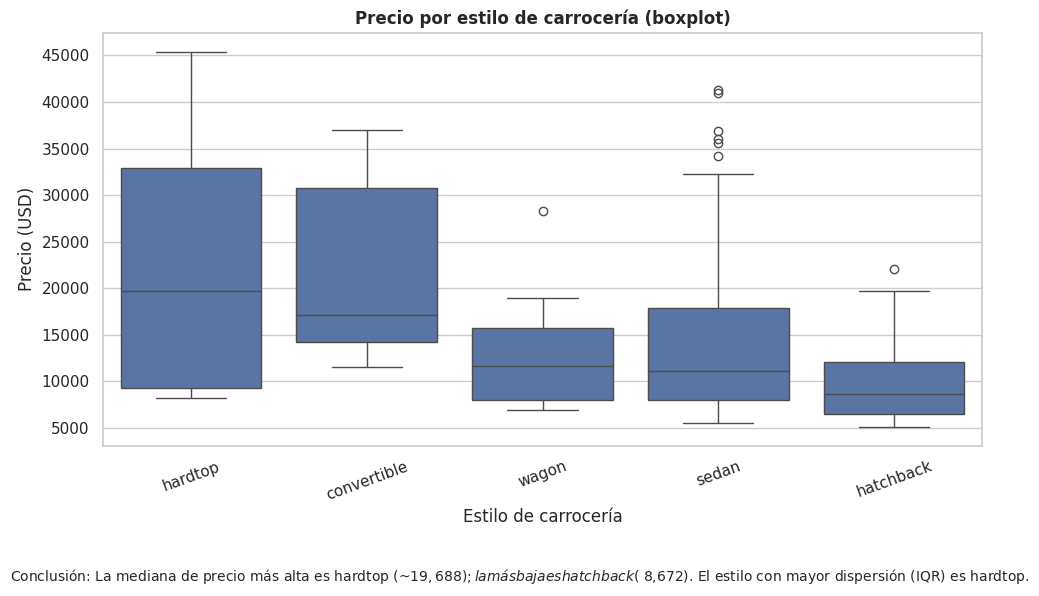

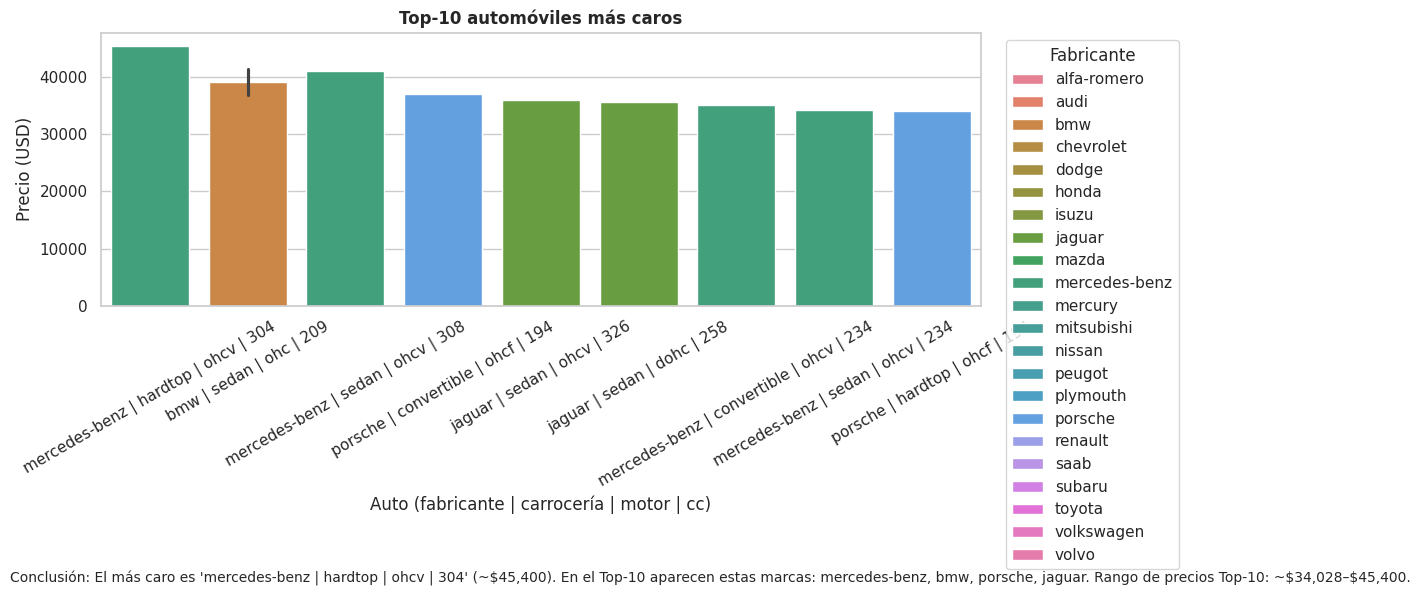

/tmp/ipython-input-1121507107.py:147: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_asp = df_scatter.groupby(huev)[yv].median().sort_values(ascending=False)


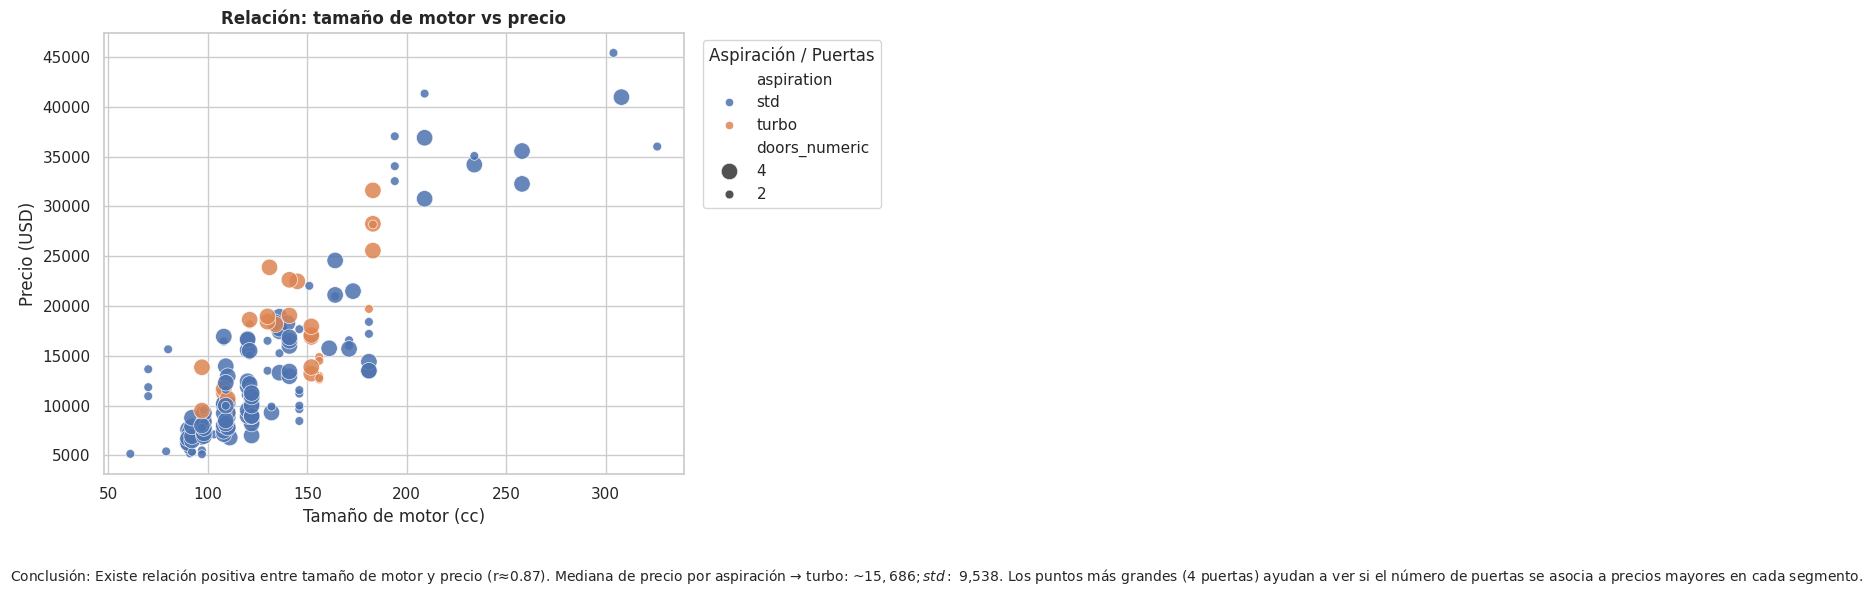

✅ Listo. Gráficos guardados en: /content/outputs_bivariado


In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CSV_PATH = "automobile_dataset.csv"
OUTPUT_DIR = "outputs_bivariado"
os.makedirs(OUTPUT_DIR, exist_ok=True)

sns.set(style="whitegrid", context="notebook")
plt.rcParams["axes.titleweight"] = "bold"

df = pd.read_csv(CSV_PATH)

df = df.replace('?', np.nan)

numeric_cols = [
    'symboling','normalized_losses','wheel_base','length','width','height','curb_weight',
    'engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm',
    'city_mpg','highway_mpg','price'
]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

for c in ["make","drive_wheels","body_style","aspiration","num_doors","engine_type"]:
    if c in df.columns:
        df[c] = df[c].astype("category")

dw = "drive_wheels"
mk = "make"
ct = (pd.crosstab(df[mk], df[dw], normalize='index') * 100).fillna(0)

order_makes = df[mk].value_counts().index
ct = ct.loc[order_makes]

fig, ax = plt.subplots(figsize=(max(12, len(ct) * 0.6), 6))
ct.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
ax.set_title("Distribución (%) de tipos de tracción por fabricante")
ax.set_xlabel("Fabricante")
ax.set_ylabel("Proporción (%)")
ax.legend(title="drive_wheels", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.tick_params(axis='x', rotation=45)

overall = df[dw].value_counts(normalize=True).mul(100).sort_values(ascending=False)
top_drive = overall.index[0] if len(overall) else "N/A"
top_pct = overall.iloc[0] if len(overall) else np.nan
makes_rwd = []
if 'rwd' in ct.columns:
    makes_rwd = ct['rwd'].sort_values(ascending=False).head(3).index.tolist()
conclusion1 = (
    f"Conclusión: La tracción predominante en el conjunto es '{top_drive}' "
    f"({top_pct:.1f}%). "
    + (f"Las marcas con mayor proporción de 'rwd' son: {', '.join(makes_rwd)}."
       if len(makes_rwd) else "No hay fabricantes con 'rwd' destacado.")
)
fig.tight_layout(rect=[0, 0.08, 1, 1])
fig.text(0.01, 0.01, conclusion1, ha='left', va='bottom', fontsize=10)
fig.savefig(os.path.join(OUTPUT_DIR, "stacked_drivewheels_by_make.png"), dpi=150, bbox_inches="tight")
plt.show()

bs = "body_style"
price = "price"
df_box = df[[bs, price]].dropna()

order_bs = df_box.groupby(bs)[price].median().sort_values(ascending=False).index

fig2, ax2 = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_box, x=bs, y=price, order=order_bs, ax=ax2)
ax2.set_title("Precio por estilo de carrocería (boxplot)")
ax2.set_xlabel("Estilo de carrocería")
ax2.set_ylabel("Precio (USD)")
ax2.tick_params(axis='x', rotation=20)

medianas = df_box.groupby(bs)[price].median().sort_values(ascending=False)
iqr = df_box.groupby(bs)[price].agg(lambda s: s.quantile(0.75) - s.quantile(0.25))
top_body, top_med = medianas.index[0], medianas.iloc[0]
low_body, low_med = medianas.index[-1], medianas.iloc[-1]
var_body = iqr.sort_values(ascending=False).index[0]
conclusion2 = (f"Conclusión: La mediana de precio más alta es {top_body} "
               f"(~${top_med:,.0f}); la más baja es {low_body} (~${low_med:,.0f}). "
               f"El estilo con mayor dispersión (IQR) es {var_body}.")
fig2.tight_layout(rect=[0, 0.08, 1, 1])
fig2.text(0.01, 0.01, conclusion2, ha='left', va='bottom', fontsize=10)
fig2.savefig(os.path.join(OUTPUT_DIR, "box_price_by_body_style.png"), dpi=150, bbox_inches="tight")
plt.show()

def make_label(row):
    parts = [str(row.get('make', ''))]

    for key in ['body_style', 'engine_type', 'engine_size']:
        val = row.get(key, np.nan)
        if pd.notna(val):
            parts.append(str(val))
    return " | ".join(parts)

df_top = df[[price, 'make', 'body_style', 'engine_type', 'engine_size']].dropna(subset=[price]).copy()
df_top['car_label'] = df_top.apply(make_label, axis=1)

top10 = df_top.sort_values(price, ascending=False).head(10)
fig3, ax3 = plt.subplots(figsize=(12, 6))
sns.barplot(data=top10, x='car_label', y=price, hue='make', dodge=False, ax=ax3)
ax3.set_title("Top-10 automóviles más caros")
ax3.set_xlabel("Auto (fabricante | carrocería | motor | cc)")
ax3.set_ylabel("Precio (USD)")
ax3.tick_params(axis='x', rotation=30)
ax3.legend(title="Fabricante", bbox_to_anchor=(1.02, 1), loc="upper left")

if len(top10) > 0:
    top_row = top10.iloc[0]
    max_label = top_row['car_label']
    max_price = top_row[price]
    marcas_top = ", ".join(top10['make'].astype(str).unique())
    rango = (top10[price].min(), top10[price].max())
    conclusion3 = (f"Conclusión: El más caro es '{max_label}' (~${max_price:,.0f}). "
                   f"En el Top-10 aparecen estas marcas: {marcas_top}. "
                   f"Rango de precios Top-10: ~${rango[0]:,.0f}–${rango[1]:,.0f}.")
else:
    conclusion3 = "Conclusión: No hay suficientes datos de precio para formar el Top-10."
fig3.tight_layout(rect=[0, 0.1, 1, 1])
fig3.text(0.01, 0.01, conclusion3, ha='left', va='bottom', fontsize=10)
fig3.savefig(os.path.join(OUTPUT_DIR, "bar_top10_expensive.png"), dpi=150, bbox_inches="tight")
plt.show()

xv = "engine_size"
yv = "price"
huev = "aspiration"
sizev = "num_doors"

size_numeric = df[sizev].map({'two': 2, 'four': 4})
df_scatter = df[[xv, yv, huev]].copy()
df_scatter['doors_numeric'] = size_numeric
df_scatter = df_scatter.dropna(subset=[xv, yv, huev, 'doors_numeric'])

fig4, ax4 = plt.subplots(figsize=(9, 6))
sns.scatterplot(
    data=df_scatter, x=xv, y=yv, hue=huev, size='doors_numeric',
    sizes=(40, 140), alpha=0.85, ax=ax4
)
ax4.set_title("Relación: tamaño de motor vs precio")
ax4.set_xlabel("Tamaño de motor (cc)")
ax4.set_ylabel("Precio (USD)")
ax4.legend(bbox_to_anchor=(1.02, 1), loc="upper left", title="Aspiración / Puertas")

corr = df_scatter[[xv, yv]].corr().iloc[0, 1]
median_by_asp = df_scatter.groupby(huev)[yv].median().sort_values(ascending=False)
by_asp_text = "; ".join([f"{i}: ~${v:,.0f}" for i, v in median_by_asp.items()])
conclusion4 = (f"Conclusión: Existe relación positiva entre tamaño de motor y precio "
               f"(r≈{corr:.2f}). Mediana de precio por aspiración → {by_asp_text}. "
               f"Los puntos más grandes (4 puertas) ayudan a ver si el número de puertas "
               f"se asocia a precios mayores en cada segmento.")
fig4.tight_layout(rect=[0, 0.08, 1, 1])
fig4.text(0.01, 0.01, conclusion4, ha='left', va='bottom', fontsize=10)
fig4.savefig(os.path.join(OUTPUT_DIR, "scatter_engine_size_vs_price.png"), dpi=150, bbox_inches="tight")
plt.show()

print("✅ Listo. Gráficos guardados en:", os.path.abspath(OUTPUT_DIR))

4. Genera un mapa de calor de la matriz de correlación entre las variables numéricas del conjunto de datos, mostrando los valores de correlación en cada celda.
* ¿Cuáles son las tres variables más correlacionadas con el precio?

En el análisis de correlación se observa que existen muchos pares de variables altamente correlacionadas, lo que puede afectar el desempeño de los modelos de regresión. PCA resulta útil no solo para reducir la dimensionalidad, sino también porque los componentes principales son ortogonales entre sí, es decir, tienen correlación cero, evitando problemas de multicolinealidad. Esto lo podrás comprobrar más adelante.

# Ingeniería de características

5. Realiza las siguientes operaciones de ingeniería de características en las variables numéricas:
* Aplica `SimpleImputer` para tratar los valores faltantes, justificando la estrategia de imputación seleccionada.
* Considera `price` como la variable objetivo y guárdala en `y`. Separa los predictores numéricos en `X`. Con base en estos datos, ¿cuántos componentes principales se generarán al aplicar PCA?
* Escala los valores de `X` para que todas las variables contribuyan equitativamente y ninguna domine el análisis por tener una escala mayor.

PCA está diseñado principalmente para variables numéricas y funciona encontrando combinaciones lineales de las variables originales que capturan la mayor varianza en los datos. Normalmente se recomienda eliminar las variables categóricas antes de aplicar PCA y luego concatenarlas nuevamente con los resultados de PCA si se desea.

6. Aplica `PCA` a los datos escalados para proyectarlos en el nuevo espacio de vectores.
* Asigna nombres descriptivos a los componentes principales en el dataframe resultante, utilizando la convención PC1, PC2, PC3, y así sucesivamente.
* Genera un mapa de calor con la matriz de correlaciones de los componentes principales para verificar que sean independientes entre sí.

7. Obtén el porcentaje de varianza explicada por cada componente.
* Grafica la curva de varianza acumulada para determinar el número mínimo de componentes principales que explican más del 90% de la varianza total.

8. Imprime la información de los componentes seleccionados (cargas o pesos de las variables originales) para interpretar qué variables contribuyen más a cada componente principal.
* Dibuja un diagrama de barras que muestre qué variables originales aportan más al primer componente principal (PC1), para visualizar su influencia relativa.

9. Codifica las variables categóricas mediante *One-Hot Encoding* y utiliza el parámetro `drop='first'` para evitar problemas de multicolinealidad entre las variables dummy generadas.

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas y la variable de salida.
* Almacena el dataframe resultante en archivo.